**Predmet**: Principi prezentacije i prepoznavanja oblika

**Student**: Sandra Melović IT43/2019

**UVOD**

Tema projekta je klasifikacija LEGO figura. Projekat ima za cilj razvoj preciznog modela za automatsko prepoznavanje i klasifikaciju LEGO minifigura na osnovu njihovih slika. LEGO figure predstavljaju neizostavan deo LEGO setova i imaju široku paletu tema i likova. Automatsko klasifikovanje LEGO figura ima potencijalne primene u oblastima kao što su upravljanje inventarom, e-trgovina, kolekcionarstvo i gejming.

**KLASIFIKACIJA**

Klasifikacija se koristi u širokom spektru primena, od prepoznavanja objekata na slikama do dijagnostikovanja medicinskih stanja. Osnovna ideja je da model nauči karakteristike i obrasce iz trening podataka kako bi mogao da donese ispravne odluke o kategorizaciji novih, nepoznatih podataka.

Proces klasifikacije uključuje nekoliko koraka. Prvo, trening podaci se koriste za obuku modela, pri čemu se ulazni podaci i odgovarajuće oznake uparuju. Model tada koristi ove podatke kako bi naučio veze između određenih karakteristika i njihovih odgovarajućih klasa. Ova faza uključuje optimizaciju parametara modela kako bi se minimizovala greška predviđanja.

Nakon obuke, model se evaluira na test podacima kako bi se procenila njegova tačnost i sposobnost generalizacije na nepoznate podatke. Ova evaluacija pomaže u otkrivanju potencijalnih problema kao što su prenaučenost (overfitting) ili nedovoljna generalizacija.

Klasifikacija je veoma korisna tehnika koja se može primeniti u mnogim oblastima. Na primer, u medicini se može koristiti za klasifikaciju tumora na benigni i maligni, što pomaže u donošenju odluka o lečenju. U finansijskom sektoru se može koristiti za detekciju prevara na osnovu transakcionih podataka. U marketingu se može koristiti za segmentaciju korisnika na osnovu njihovih preferencija i ponašanja.

Na primer, algoritam može naučiti da predvidi da li je određena e-pošta spam ili ne-spam (nije spam), kao što je prikazano u nastavku.[1]

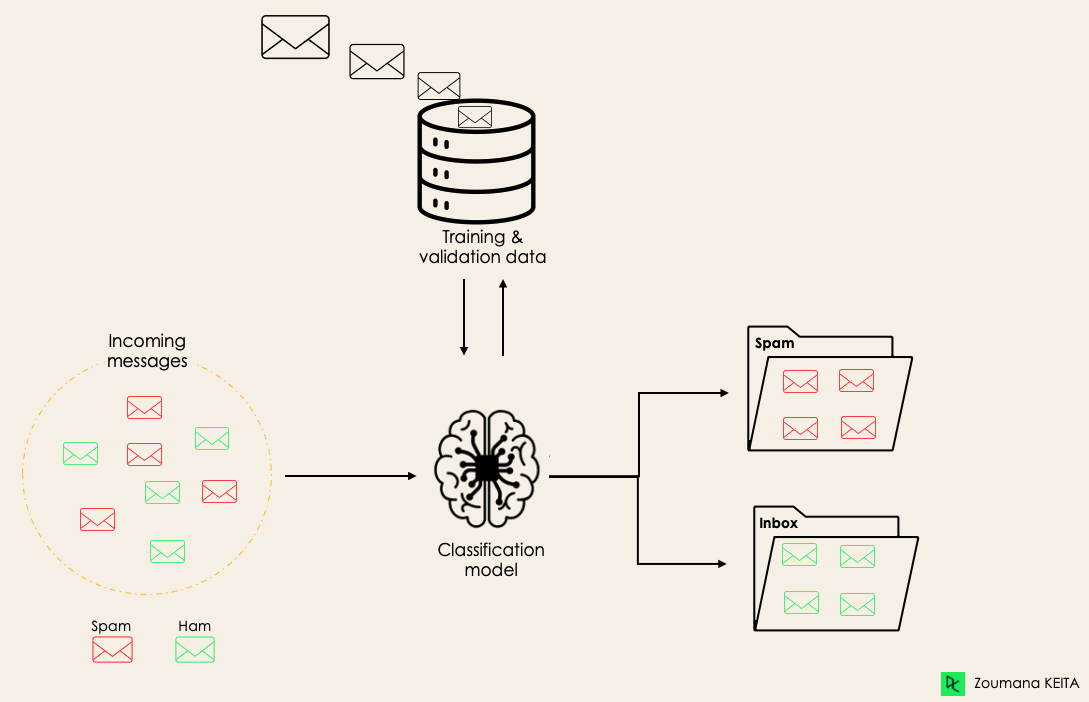


**SET PODATAKA**

Za ovaj projekat koristili smo sveobuhvatan skup podataka koji sadrži slike LEGO figura. Skup podataka obuhvata raznovrsnu kolekciju LEGO minifigura, koje pokrivaju širok spektar tema i likova. Sadrži slike iz različitih uglova i perspektiva, što predstavlja realan scenario za obuku i evaluaciju našeg modela za klasifikaciju. Svaka slika je povezana sa oznakom klase koja ukazuje na tip minifigure koju predstavlja.

**ZAKLJUČAK**

Projekat Klasifikacije LEGO figura ima za cilj automatizaciju procesa identifikacije i kategorizacije LEGO minifigura. Korišćenjem tehnika dubokog učenja i obuhvatnog skupa podataka, razvili smo model koji može tačno klasifikovati različite tipove LEGO figura. Ovaj projekat otvara mogućnosti za različite primene, od upravljanja inventarom LEGO kolekcionara do unapređenog iskustva elektronske trgovine.


**REFERENCE**

[1] Zoumana Keita (2022) Classification in Machine Learning, PyImageSearch. Available at: https://www.datacamp.com/blog/classification-machine-learning (Accessed: 16 June 2023).

In [1]:
# Importing some libraries.
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator#, img_to_array, load_img
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model, load_model

Uvozimo potrebne biblioteke koje će biti korišćene tokom izrade modela za klasifikaciju LEGO figura.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Montiramo Google Drive kako bismo mogli pristupiti zip arhivi koja sadrži podatke o LEGO figurama.

In [3]:
import zipfile

zip_path = '/content/drive/MyDrive/LEGO_Classification.zip'
extract_path = '/content/datasetFolder'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Koristimo zipfile biblioteku za izvlačenje podataka iz zip arhive i definišemo putanju do zip arhive i direktorijum za izvlačenje podataka.

In [4]:
index_file = pd.read_csv(r"/content/datasetFolder/index.csv", encoding='cp1252')
metadata = pd.read_csv(r"/content/datasetFolder/metadata.csv", encoding='cp1252')

Učitavamo indeksni fajl i metapodatke koji sadrže informacije o klasama i nazivima LEGO figura.

In [5]:
index_file.head()
metadata.head()

,class_id,lego_ids,lego_names,minifigure_name
0,1,[76115],['Spider Mech vs. Venom'],SPIDER-MAN
1,2,[76115],['Spider Mech vs. Venom'],VENOM
2,3,[76115],['Spider Mech vs. Venom'],AUNT MAY
3,4,[76115],['Spider Mech vs. Venom'],GHOST SPIDER
4,5,[75208],"[""Yoda's Hut""]",YODA


In [6]:
df = pd.merge(index_file, metadata[['class_id','minifigure_name']], on='class_id')
df

,path,class_id,minifigure_name
0,marvel/0001/001.jpg,1,SPIDER-MAN
1,marvel/0001/002.jpg,1,SPIDER-MAN
2,marvel/0001/003.jpg,1,SPIDER-MAN
3,marvel/0001/004.jpg,1,SPIDER-MAN
4,marvel/0001/005.jpg,1,SPIDER-MAN
...,...,...,...
366,star-wars/0017/006.jpg,38,BOBA FETT
367,star-wars/0017/007.jpg,38,BOBA FETT
368,star-wars/0017/008.jpg,38,BOBA FETT
369,star-wars/0017/009.jpg,38,BOBA FETT


Spajamo indeksni fajl i metapodatke na osnovu ID-ja klase kako bismo dobili sve potrebne informacije o figurama.

<Axes: >

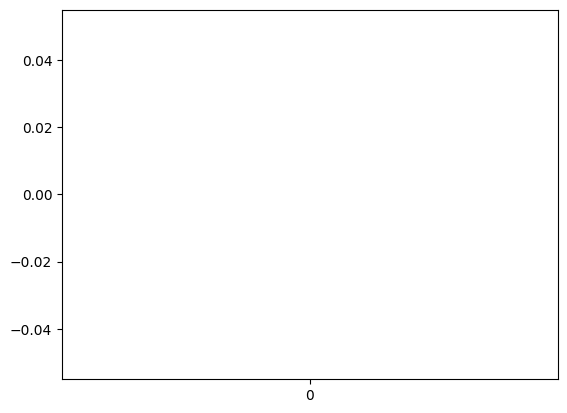

In [7]:
sns.barplot()

<Axes: title={'center': 'MINIFIGURE COUNTS'}>

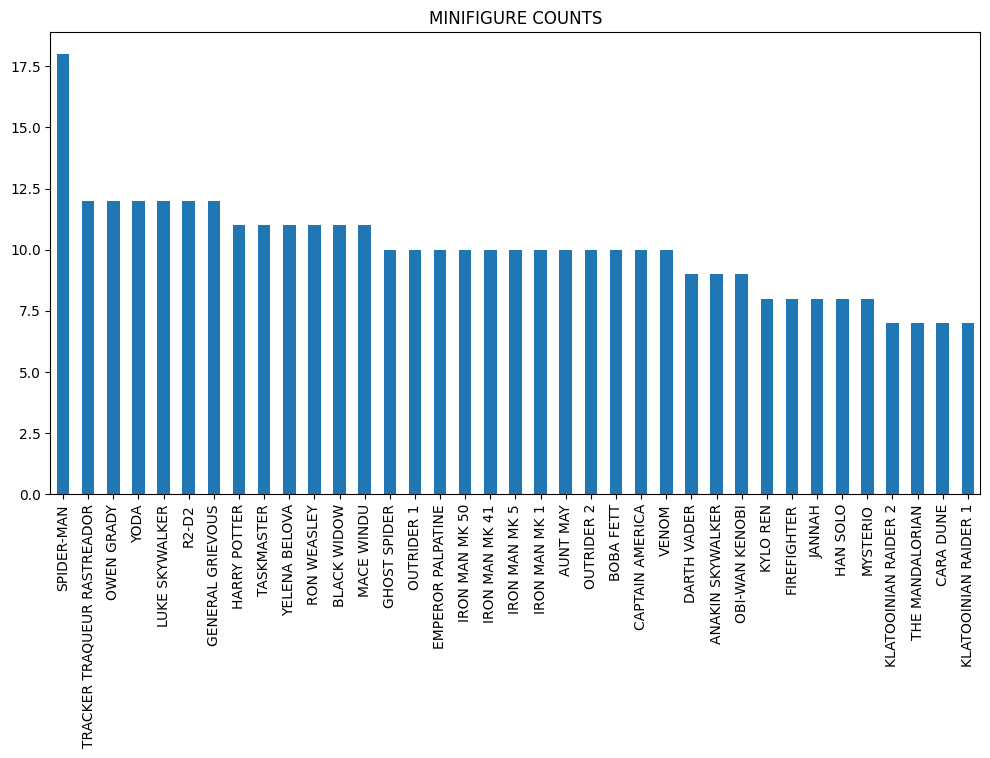

In [8]:
df['minifigure_name'].value_counts().plot(kind='bar', figsize=(12,6), title='MINIFIGURE COUNTS')

Prikazujemo trakasti grafikon koji prikazuje brojnost svake LEGO figure.

In [9]:
df_train = pd.DataFrame([])
df_valid = pd.DataFrame([])

for i in range(1,len(df['class_id'].value_counts())+1):
    df_train = df_train.append(df[df['class_id'] == i].iloc[ :-1])
    df_valid = df_valid.append(df[df['class_id'] == i].iloc[-1: ])

<ipython-input-9-5594537eb1f9>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df[df['class_id'] == i].iloc[ :-1])
<ipython-input-9-5594537eb1f9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_valid = df_valid.append(df[df['class_id'] == i].iloc[-1: ])
<ipython-input-9-5594537eb1f9>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(df[df['class_id'] == i].iloc[ :-1])
<ipython-input-9-5594537eb1f9>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_valid = df_valid.append(df[df['class_id'] == i].iloc[-1: ])
<ipython-input-9-5594537eb1f9>:5: FutureWarning: The frame.append method

Kreiramo dve prazne DataFrame strukture za trening i validacioni skup podataka. Zatim prolazimo kroz sve klase LEGO figura i dodajemo odgovarajuće podatke u trening i validacioni skup na osnovu odnosa 80:20

In [10]:
print('no. of classes: ', len(df['class_id'].unique()))
print('no. of names: ', len(df['minifigure_name'].unique()))

no. of classes:  38
no. of names:  37


Ispisujemo broj jedinstvenih klasa i broj jedinstvenih naziva figura.

In [11]:
common_dir = "/content/datasetFolder"

Definišemo zajednički direktorijum koji sadrži slike LEGO figura.

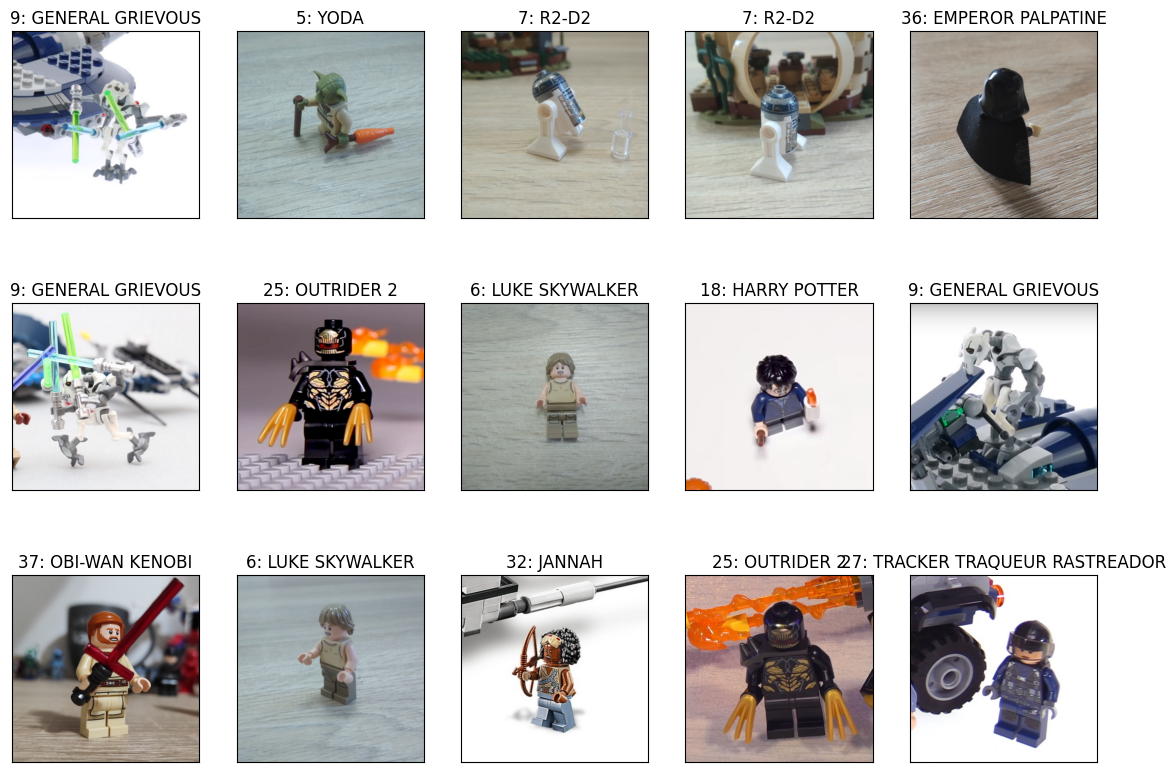

In [12]:
plt.figure(figsize=(14,10))
for i, j in enumerate(df.sample(15).iterrows(), 1):
    plt.subplot(3,5,i)
    image = cv2.imread(os.path.join(common_dir, j[1]['path']))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"{j[1]['class_id']}: {j[1]['minifigure_name']}")
    plt.xticks([])
    plt.yticks([])

Prikazujemo nasumično odabrane slike LEGO figura iz trening skupa podataka.

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.3, rotation_range=30,
                                   width_shift_range=0.3, height_shift_range=0.3,
                                   brightness_range=[0.2,1.0], horizontal_flip=True,
                                   vertical_flip= True, fill_mode='nearest',zoom_range=0.4)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

Koristimo ImageDataGenerator za generisanje trening i validacionih podataka. Takođe, vršimo normalizaciju piksela slika deljenjem sa 255.

In [14]:
train_generator = train_datagen.flow_from_dataframe(dataframe=df_train, directory=common_dir,
                                                    x_col='path',y_col='minifigure_name',shuffle=True,
                                                   target_size=(256,256),batch_size=8)

valid_generator = valid_datagen.flow_from_dataframe(dataframe= df_valid, directory= common_dir,
                                                   x_col='path', y_col='minifigure_name',
                                                   shuffle=False, batch_size=8, target_size=(256,256))

Found 333 validated image filenames belonging to 37 classes.
Found 38 validated image filenames belonging to 37 classes.


In [15]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Checkpoint to save the best model measuring the val_loss.
callbacks_save = ModelCheckpoint('best LEGO-CNN.hdf5',
                                 monitor='val_loss',
                                 mode='min',
                                 save_best_only=True)

Definišemo modele za rano zaustavljanje i čuvanje najboljeg modela tokom obuke.



In [16]:
!pip install efficientnet
import efficientnet.keras as efn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instaliramo efficientnet biblioteku koja će nam pomoći u klasifikaciji LEGO figura.



In [17]:
base_model = efn.EfficientNetB6(input_shape=(256,256,3),
                                weights='imagenet',
                                include_top=False,
                                pooling='avg')
# Here 3 in input_shape represent channels:
# In RFB image their are 3 channels(coloured image in layman's language).

x = Dropout(0.3)(base_model.output)    # adding Droupout layer to the model.
prediction_efn = Dense(37, activation='softmax')(x)
model = Model(base_model.input, prediction_efn)

model.compile(optimizer = Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

Koristimo prethodno instaliranu biblioteku efficientnet za kreiranje baznog modela sa arhitekturom EfficientNetB6. Uzimamo u obzir samo slojeve ispod globalnog proseka kako bismo dodali nove slojeve za klasifikaciju.

Dodajemo Dropout sloj sa verovatnoćom 0.3 kako bismo izbegli prenaučenost modela. Zatim dodajemo potpuno povezani sloj sa softmax aktivacijom koji će izlaziti na 31 klasu (broj jedinstvenih LEGO figura).

Kompajliramo model koristeći Adam optimizator, kategoričku unakrsnu entropiju kao gubitak i tačnost kao metriku.

In [18]:
model.fit(x=train_generator,
          validation_data=valid_generator,
          epochs=20,
          callbacks=[early_stop, callbacks_save])

Epoch 1/20
42/42 [==============================] - 818s 17s/step - loss: 3.6242 - accuracy: 0.0270 - val_loss: 3.5324 - val_accuracy: 0.1053
Epoch 2/20
42/42 [==============================] - 716s 17s/step - loss: 3.3918 - accuracy: 0.1381 - val_loss: 3.3639 - val_accuracy: 0.2105
Epoch 3/20
42/42 [==============================] - 712s 17s/step - loss: 3.1380 - accuracy: 0.3303 - val_loss: 3.0585 - val_accuracy: 0.4211
Epoch 4/20
42/42 [==============================] - 707s 17s/step - loss: 2.8121 - accuracy: 0.4895 - val_loss: 2.6181 - val_accuracy: 0.5789
Epoch 5/20
42/42 [==============================] - 714s 17s/step - loss: 2.2496 - accuracy: 0.6486 - val_loss: 2.0546 - val_accuracy: 0.7105
Epoch 6/20
42/42 [==============================] - 720s 17s/step - loss: 1.7648 - accuracy: 0.7417 - val_loss: 1.5512 - val_accuracy: 0.7632
Epoch 7/20
42/42 [==============================] - 721s 17s/step - loss: 1.3076 - accuracy: 0.8108 - val_loss: 1.1091 - val_accuracy: 0.8684
Epoch 

Pokrećemo obuku modela na trening podacima, koristeći validacione podatke za procenu performansi modela. Takođe koristimo definisane rane zaustavljanja i čuvanja modela.

In [19]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']

Čuvamo istoriju gubitka i tačnosti modela kako bismo ih kasnije prikazali.

Text(0.5, 1.0, 'Training and validation loss')

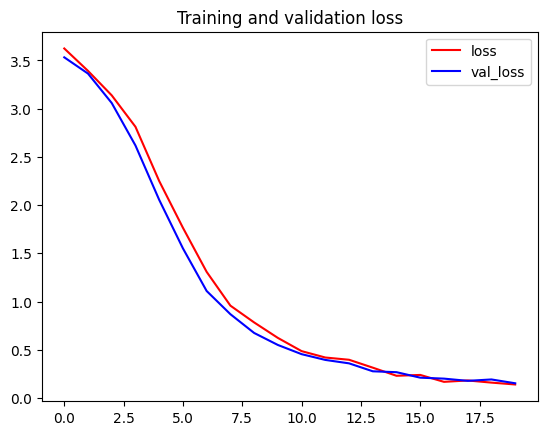

In [20]:
# Plotting Training and Validation set loss.

plt.plot(loss, color='r', label='loss')
plt.plot(val_loss, color='b', label='val_loss')
plt.legend()
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation Accuracy')

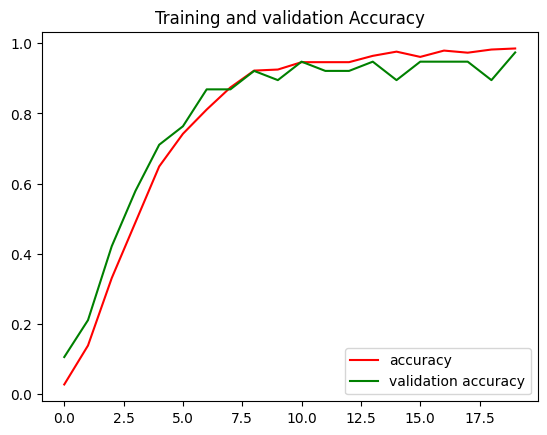

In [21]:
# Plotting Training and Validation set Accuracy.

plt.plot(accuracy, color='r', label='accuracy')
plt.plot(val_accuracy, color='g', label='validation accuracy')
plt.legend()
plt.title('Training and validation Accuracy')

Prikazujemo grafikone za gubitak modela tokom obuke i tačnost na trening i validacionom skupu.

In [22]:
model_LEGO = load_model('best LEGO-CNN.hdf5')


Učitavamo najbolji model koji je sačuvan tokom obuke.

Text(0.5, 1.0, 'TRACKER TRAQUEUR RASTREADOR')

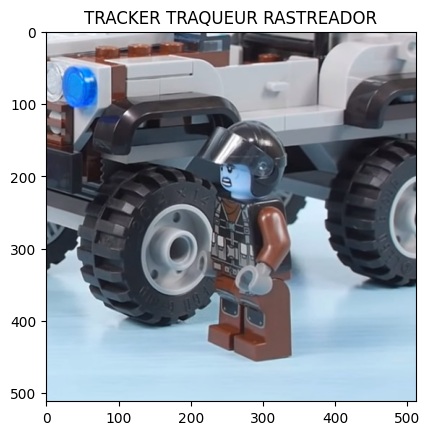

In [23]:
import random

n = len(df_valid)
random_image = random.randrange(n) # randomly selecting one number.

test_set = df_valid['path'].iloc[random_image] # Picking the image based on randomly selected number.

# Graphically representing the Image.
test_image = cv2.imread(os.path.join(common_dir, test_set))
plt.imshow(test_image)
plt.title(df_valid['minifigure_name'].iloc[random_image])

Nasumično biramo jednu sliku iz validacionog skupa podataka.



In [24]:
test_image = cv2.resize(test_image, dsize=(256,256))# reshaping the image size into(512,512)
test_image = np.reshape(test_image, (1,256,256,3)) # 1 image, (512,512) size, 3 representing the RGB type.

prediction = model.predict(test_image).argmax()

1/1 [==============================] - 7s 7s/step


Prikazujemo odabranu sliku i pravimo predikciju klasifikacije na osnovu modela.



In [25]:
minifigure_name = metadata['minifigure_name'][metadata['class_id'] == prediction].iloc[0]
print('True name of predicted figure: ', minifigure_name)

True name of predicted figure:  VENOM


Prikazujemo pravo ime predviđene LEGO figure na osnovu metapodataka.